# REBOUND

[REBOUND](https://rebound.readthedocs.io/en/latest/) is an N-body integrator, i.e. a software package that can integrate the motion of particles under the influence of gravity. The particles can represent stars, planets, moons, ring or dust particles. REBOUND is very flexible and can be customized to accurately and efficiently solve many problems in astrophysics. 

In [ ]:
import rebound

## Particles

[The particle object](https://rebound.readthedocs.io/en/latest/particles/) contains the following variables which can be directly manipulated:

**`double`**`m` $\rightarrow$ mass\
**`double`**`r` $\rightarrow$ physical radius of the particle\
**`double`**`x, y, z, vx, vy, vz` $\rightarrow$ position and velocity coordinates\
**`uint32_t`**`hash` $\rightarrow$ integer or hash value used to identify the particle

One way to add a particle to a simulation is to first manually create a particle object, then calling a function to add the particle to the simulation. Because the function will make a copy of the particle, you can safely delete the original particle object after you've added it to a simulation. **Any components not passed automatically default to 0**. The following code shows an example on how to add particles this way:

In [ ]:
sim = rebound.Simulation()   # This creates the simulation object "sim" 
p = rebound.Particle()       # This creates the particle object "p" 
p.m = 1.                     # Edit particle fields
p.hash="Sun"
sim.add(p)                   # Add the particle "p" to the simulation "sim" 

By far the easiest way to add particles to REBOUND is to use the `add` method directly:

In [ ]:
sim.add(x=5.2,vy=0.44,hash="Jup")
sim.add(x=39.2,vy=0.18,hash="Pluto")

You then access the `particle` using the simulation's particles array (via index or [hash](https://rebound.readthedocs.io/en/latest/ipython_examples/UniquelyIdentifyingParticlesWithHashes/)):

In [ ]:
sim.particles[2].hash ,sim.particles["Pluto"].x

Let's have a quick look at what's in this simulation by using:

In [ ]:
sim.status()

REBOUND comes with a simple way to plot **instantaneous** orbits of planetary systems. The [OrbitPlot](https://rebound.readthedocs.io/en/latest/ipython_examples/OrbitPlot/) method:

In [ ]:
rebound.OrbitPlot(sim)

You can [remove particles](https://rebound.readthedocs.io/en/latest/removingparticles/) using it **hash** or **index**, but in general particles can change positions in the particles array during simulations, so a more robust way of referring to particles (rather than through their index) is through their hash, which won't change. See [Removing particles from the simulation](https://rebound.readthedocs.io/en/latest/ipython_examples/RemovingParticlesFromSimulation/) for more information.

In [ ]:
sim.remove(hash="Pluto")
sim.status()
rebound.OrbitPlot(sim)

## [Reference frames](https://rebound.readthedocs.io/en/latest/simulationreferenceframes/)

Compared to other N-body codes, REBOUND does not use a predefined coordinate system. It works in any inertial frame. This makes setting up simulations and interpreting outputs more intuitive. However, one often wants to move to a specific coordinate system. REBOUND has several built-in functions to do that.

In [ ]:
sim = rebound.Simulation()   # Restart the simulation object "sim" 
sim.add(m=1,x=1,vy=0.1)
sim.add(m=0.1,x=2,vz=0.2)

Here is how you can move the simulation to the heliocentric frame:

In [ ]:
sim.move_to_hel()
sim.status()

This moves all particles in the simulation by the same amount so that afterwards, **the particle with index 0 is located at the origin**. Note that as the integration progresses, it is not guaranteed that the particle with index 0 remains at the origin. Most likely, it will drift away from the origin.

If you are not in the **center-of-mass frame**, the center-of-mass will and all the particles will slowly drift away from the origin. This has important consequences for long-term integrations. If the particles are far away from the origin, you might increase the numerical errors due to finite floating point precision. By moving to the center-of-mass frame after setting up all the particles, you'll avoid these issues:

In [ ]:
sim.move_to_com()
sim.status()

## Orbits

There is **no** a one-to-one mapping between (x,y,z,vx,vy,vz) and orbital elements, and one should always specify the `primary`, i.e. the orbital elements are referenced against (e.g., the central star, the system's barycenter, etc.). The differences between orbital elements referenced to these centers differ by $\sim$ the mass ratio of the largest body to the central mass. By default, REBOUND always uses **Jacobi elements**, which for each particle are always referenced to the center of mass of all particles with lower index in the simulation. [Further details on orbital elements](https://rebound.readthedocs.io/en/latest/ipython_examples/OrbitalElements/).

In [ ]:
sim = rebound.Simulation()
sim.add(m=1)               # Star
sim.add(m=0.1,a=1)   # Planet
sim.add(a=2)                          # Test Particle around COM
sim.add(primary=sim.particles[0],a=2) # Test Particle around Star

print(sim.particles[2].orbit)
print(sim.particles[3].orbit)

sim.status()

ob1 = rebound.OrbitPlot(sim)
ob2 = rebound.OrbitPlot(sim, particles = [3], primary = sim.particles[0],fig=ob1.fig, ax = ob1.ax, color="red")

You can use any combination of orbital parameters that makes physically sense. The following image illustrated the most important angles used. In REBOUND the reference direction is the positive x direction, the reference plane is the xy plane.

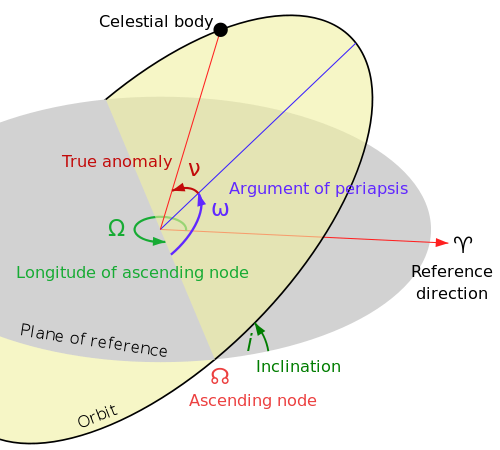

`d` $\rightarrow$ radial distance from reference \
`v` $\rightarrow$ velocity relative to central object's velocity \
`h` $\rightarrow$ specific angular momentum \
`P` $\rightarrow$ orbital period (negative if hyperbolic) \
`n` $\rightarrow$ mean motion (negative if hyperbolic) \
`a` $\rightarrow$ semi-major axis \
`e` $\rightarrow$ eccentricity \
`inc` $\rightarrow$ inclination \
`Omega` $\rightarrow$ longitude of ascending node \
`omega` $\rightarrow$ argument of pericenter \
`pomega` $\rightarrow$ longitude of pericenter \
`f` $\rightarrow$ true anomaly \
`M` $\rightarrow$ mean anomaly \
`E` $\rightarrow$ Eccentric anomaly. Because this requires solving Kepler's equation it is only calculated when needed in python and never 
calculated in C. To get the eccentric anomaly in C, use the function **`double`**`reb_M_to_E(double e, double M)` \
`l` $\rightarrow$ mean longitude = Omega + omega + M\
`theta` $\rightarrow$ true longitude = Omega + omega + f\
`T` $\rightarrow$ time of pericenter passage\
`rhill` $\rightarrow$ Hill radius, $r_{hill}=a\sqrt[3]{\frac{m}{3M}}$ \
`pal_h` $\rightarrow$ Cartesian component of the eccentricity, $h=e\cdot\sin$(`pomega`)\
`pal_k` $\rightarrow$ Cartesian component of the eccentricity, $k=e\cdot\sin$(`pomega`)\
`pal_ix` $\rightarrow$ Cartesian component of the inclination, $i_x=2\cdot\sin{\frac{i}{2}}\cdot\cos$(`Omega`)\
`pal_iy` $\rightarrow$ Cartesian component of the inclination, $i_y=2\cdot\sin{\frac{i}{2}}\cdot\sin$(`Omega`)

## [Adding particles using NASA JPL Horizons system](https://rebound.readthedocs.io/en/latest/ipython_examples/Horizons/)

REBOUND can add particles to simulations by obtaining ephemerides from NASA's powerful [HORIZONS database](https://ssd.jpl.nasa.gov/?horizons_doc). HORIZONS supports many different options.

When we add particles by passing a string, REBOUND queries the HORIZONS database and takes the first dataset HORIZONS offers. For the Sun, moons, and small bodies, this will typically return the body itself. **For planets, it will return the barycenter of the system** (for moonless planets like Venus it will say barycenter but there is no distinction). If you want the planet specifically, you have to use, e.g., "NAME=Pluto" rather than "Pluto". In all cases, REBOUND will print out the name of the HORIZONS entry it's using. You can also add bodies using their integer [NAIF IDs](https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/MATLAB/req/naif_ids.html).

By default, REBOUND queries HORIZONS for objects' **current positions**. Specifically, it caches the current time the first time you call rebound.add, and gets the corresponding ephemeris. All subsequent calls to rebound.add will then use that initial cached time to make sure you get a synchronized set of ephemerides.

You can also explicitly pass REBOUND the time at which you would like the particles ephemerides:

In [ ]:
sim = rebound.Simulation()
date = "2005-06-30 15:24" # You can also use Julian Days. For example:   date = "JD2458327.500000"
sim.add("Sun", date=date)
sim.add("399", date=date)  # Earth
sim.add("301", date=date)  # Moon
sim.status()
rebound.OrbitPlot(sim)

In [ ]:
xe=sim.particles[1].x
ye=sim.particles[1].y
ob1 = rebound.OrbitPlot(sim,particles=[1],xlim=[xe-0.003,xe+0.003],ylim=[ye-0.003,ye+0.003])
ob2 = rebound.OrbitPlot(sim, particles = [2], primary = 1,show_primary=False,fig=ob1.fig, ax = ob1.ax, color="red")

## [Units](https://rebound.readthedocs.io/en/latest/units/)

By default, REBOUND simulations use units in which $G=1$. As an example, suppose we have a central object of mass $M=1$, and a test particle orbiting on a circular orbit at a distance $a=1$. This scenario can be setup with the following code:

In [ ]:
sim = rebound.Simulation() # This creates the simulation object "sim" 
sim.add(m=1.)
sim.add(a=1.)

The orbital period of this binary is given by:

\begin{equation}
P=2\pi\sqrt{\frac{a^3}{GM}}=2\pi
\end{equation}

We can confirm this by calculating the orbital period with REBOUND:

In [ ]:
print(sim.particles[1].P)

If we interpret the central object as the sun, and the test particle as the Earth, then $M=1$ corresponds to one solar mass and $a=1$ corresponds to one astronomical unit. We know that the Earth takes one year for one orbit around the sun. Thus, one year corresponds to $2\pi$ in these units.

An alternative interpretation of the same REBOUND simulation could be the following. Suppose the central object is the Earth. Then $M=1$ corresponds to one Earth mass. If we consider the test particle to be the International Space Station, then corresponds to $6790\, \text{km}$ ($420\, \text{km}$ above the Mean Sea Level). The orbit of the particle still has a period of $2\pi$ in our units, but this would now correspond to 92.8 minutes.

One advantage of keeping $G=1$ is that you can choose units where all number in REBOUND have a magnitude of around one, as in the example above. If you where to choose other units involving centimetres or seconds, then you would have to deal with very large or very small numbers.

If you prefer to change the value of $G$, you can! The following example sets $G$ to its value in SI units:

In [ ]:
sim = rebound.Simulation()
sim.G = 6.6743e-11 # m^3 / kg s^2

From now on, all quantities that have unit of length (semi-major axis, particle radius, etc) need to be specified (and will be output) in **meters**. All quantities that have units of time (timestep, orbital period, etc) need to be specified in **seconds**. All quantities that have units of mass need to be specified in **kg**. All quantities that have units of velocity need to be specified in **meters per second**. And so on.

## Integrations: [The comet 67P/Churyumov-Gerasimenko](https://rebound.readthedocs.io/en/latest/ipython_examples/Churyumov-Gerasimenko/) (The [IAS15](https://rebound.readthedocs.io/en/latest/integrators/#ias15) integrator)

In [ ]:
sim = rebound.Simulation()
date = "2024-01-24 11:00"
sim.add("Sun",date=date)
sim.add("Jupiter",date=date)
sim.add("Saturn",date=date)
sim.add("Churyumov-Gerasimenko",date=date) # There is no mass data for small bodies in Horizons
sim.status()
fig = rebound.OrbitPlot(sim, unitlabel="[AU]")

We will integrate backwards in time for 70 years. Because we don't know what will happen yet (hint: **a close encounter**) we will use the IAS15 integrator. It is fast, accurate and has adaptive timesteps to capture any potential close encounters.

To integrate backwards, we could set a negative timestep or multiply all velocities with −1. We'll choose the first option:

In [ ]:
sim.dt = -0.01

While we're integrating, let's store the positions of Jupiter and the comet at 10000 times during the interval. We'll need to prepare a few variables to do that:

In [ ]:
import numpy as np
Noutputs = 10000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,-70.*year, Noutputs)
x = np.zeros((2,Noutputs))
y = np.zeros((2,Noutputs))
z = np.zeros((2,Noutputs))

Now we're ready to start the integration:

In [ ]:
sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[1].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[1].y
    z[0][i] = ps[1].z
    x[1][i] = ps[3].x
    y[1][i] = ps[3].y
    z[1][i] = ps[3].z

Let's plot the orbits of Jupiter (blue) and the comet (orange) to get an idea of what was going on during our integration.

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-6,6])
ax.set_ylim([-6,6])
ax.set_xlabel("x [AU]")
ax.set_ylabel("y [AU]")
plt.plot(x[0], y[0]);
plt.plot(x[1], y[1]);

As you can see in the above image, the comet 67P had a rather strong encounter with Jupiter a few years ago. Of course, if you wanted to do a realistic simulation of that encounter, you'd need to include all the other planets and maybe even some non-gravitational effects for the comet. However, let's stick with our simplistic model and try to find out when exactly the two bodies had a close encounter. We already stored the data, so we can just plot their distance as a function of time.

In [ ]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.set_xlabel("time [yr]")
ax.set_ylabel("distance [AU]")
distance = np.sqrt(np.square(x[0]-x[1])+np.square(y[0]-y[1])+np.square(z[0]-z[1]))
plt.plot(times/year, distance);
closeencountertime = times[np.argmin(distance)]/year
print("Minimum distance (%f AU) occured at time: %f years." % (np.min(distance),closeencountertime))

In [ ]:
import datetime
encounterdate = datetime.datetime(2024, 1, 24, 11, 00, 00, 000000) + datetime.timedelta(days=365.25*closeencountertime)
encounterdate.strftime("%Y-%m-%d %H:%M")

If you check [Wikipedia](https://en.wikipedia.org/wiki/67P/Churyumov%E2%80%93Gerasimenko) or [JPL](https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=67P&view=OPC), the encounter happened on 1959-Feb-04, so we are not far off (it turns out that's because of jets and other non-gravitational forces from the comet!)

## [WHFast tutorial](https://rebound.readthedocs.io/en/latest/ipython_examples/WHFast/)

This tutorial is an introduction to the python interface of WHFast, a fast and unbiased **symplectic** Wisdom-Holman integrator. This integrator is well suited for integrations of planetary systems in which **the planets stay roughly on their orbits**. If close encounters and collisions occur, then WHFast is not the right integrator. The WHFast method is described in detail in Rein & Tamayo (2015).

In [ ]:
sim = rebound.Simulation()
sim.add(m=1.)

sim.add(m=1e-3, a=1)
sim.add(m=1e-3, a=2., e=0.1)
sim.move_to_com()
sim.status()
fig = rebound.OrbitPlot(sim, unitlabel="[AU]")

You can see that REBOUND used the `ias15` integrator as a default. Next, let's tell REBOUND that we want to use `WHFast` instead. We'll also set the timestep. In our system of units, an orbit at $a=1$ has an orbital period of $T=2\pi$. So a reasonable timestep to start with would be $dt=10^{−3}$ (see Rein & Tamayo 2015 for some discussion on timestep choices).

In [ ]:
sim.integrator = "whfast"
sim.dt = 1e-3

`whfast` refers to the 2nd order symplectic integrator WHFast described by Rein & Tamayo (2015). By default, no symplectic correctors are used, but they can be easily turned on (see [Advanced Settings for WHFast](https://rebound.readthedocs.io/en/latest/ipython_examples/AdvWHFast)).

Next, we'll step through the simulation. Rebound will integrate up to time. Depending on the timestep, it might overshoot slightly. If you want to have the outputs at exactly the time you specify, you can set the `exact_finish_time=1` flag in the integrate function (or omit it altogether, 1 is the default). However, note that changing the timestep in a symplectic integrator could have negative impacts on its properties. Using the `exact_finish_time = 0` flag, which will instead integrate up to the timestep which is nearest to the endtime that you have passed to `sim.integrate`.

In [ ]:
Noutputs = 1000
times = np.linspace(0, 1000.*2.*np.pi, Noutputs)
x = np.zeros(Noutputs)
y = np.zeros(Noutputs)
for i,time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    x[i] = sim.particles[1].x
    y[i] = sim.particles[1].y
    
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])
plt.scatter(x, y, marker='.', color='k', s=1.2);

There are perturbations induced by the outer planet. Let's plot the orbital elements as a function of time:

In [ ]:
times = np.linspace(1000.*2.*np.pi, 9000.*2.*np.pi, Noutputs)
a = np.zeros(Noutputs)
e = np.zeros(Noutputs)
for i,time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    a[i] = sim.particles[2].a
    e[i] = sim.particles[2].e
    
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(121)
ax.set_xlabel("time [yr]")
ax.set_ylabel("semi-major axis [AU]")
plt.plot(times/2./np.pi, a);

ax = plt.subplot(122)
ax.set_xlabel("time [yr]")
ax.set_ylabel("eccentricity")
plt.plot(times/2./np.pi, e);

The semimajor axis seems to almost stay constant, whereas the eccentricity undergoes an oscillation.

## And much more...

[Fitting Radial Velocity Data](https://rebound.readthedocs.io/en/latest/ipython_examples/RadialVelocity/) \
[Additional forces](https://rebound.readthedocs.io/en/latest/ipython_examples/Forces/) \
[Ring Simulations](https://rebound.readthedocs.io/en/latest/ipython_examples/SaturnsRings/) \
[Checkpoints and Simulationarchive](https://rebound.readthedocs.io/en/latest/ipython_examples/Simulationarchive/) \
[Stability maps](https://rebound.readthedocs.io/en/latest/ipython_examples/Megno/)